## Monk1 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [20]:
import numpy as np

from neuralnet.network import Sequential
from neuralnet.layers import LayerDense
from neuralnet.activations import *
from neuralnet.losses import *
from neuralnet.optimizers import *

# network
net = Sequential()
net.add(LayerDense(17, 5, sigmoid))
net.add(LayerDense(5, 1, tanh))
optim = GD(net.layers, lr=0.01, momentum=0.9)
# train
net.use(mse)
net.fit(Xtrain, ytrain, epochs=500, optimizer=optim)

# test
out = net.predict(Xtrain)

epoch 500/500   error=0.00    accuracy=1.00: 100%|██████████| 500/500 [00:06<00:00, 83.05it/s]


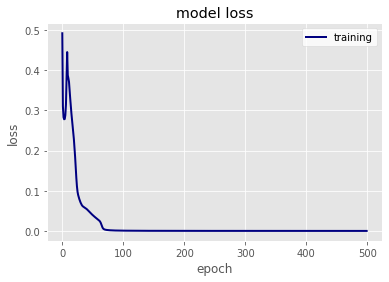

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

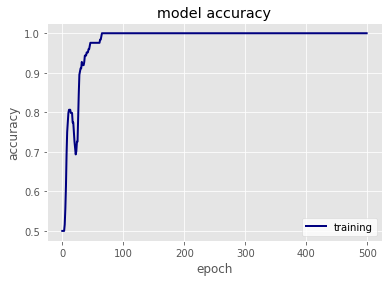

In [22]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('accuracy')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

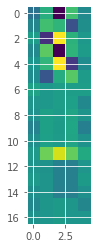

In [5]:
plt.imshow(net.layers[0].weights)

# Tensorflow model to compare with mine

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.Sequential([
    keras.Input(shape=(17,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='tanh')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


The problem here is that Tensorflow don't have the Gradient Descent methos, but only the SGD so i have to implement it to compare the two networks

In [9]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [10]:
history = model.fit(
    Xtrain ,ytrain, epochs=500, batch_size=len(Xtrain)
)

Epoch 1/500
1/1 [==============================] - 0s 973us/step - loss: 2.2137 - accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 744us/step - loss: 2.2076 - accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 2.1957 - accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 943us/step - loss: 2.1777 - accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 700us/step - loss: 2.1531 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 628us/step - loss: 2.1208 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 869us/step - loss: 2.0795 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 674us/step - loss: 2.0270 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 554us/step - loss: 1.9609 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 533us/step - loss: 1.8776 - accuracy: 0.5000
Epoch 11/50

1/1 [==============================] - 0s 952us/step - loss: 0.2475 - accuracy: 0.5081
Epoch 84/500
1/1 [==============================] - 0s 843us/step - loss: 0.2469 - accuracy: 0.5242
Epoch 85/500
1/1 [==============================] - 0s 822us/step - loss: 0.2463 - accuracy: 0.5323
Epoch 86/500
1/1 [==============================] - 0s 762us/step - loss: 0.2456 - accuracy: 0.5323
Epoch 87/500
1/1 [==============================] - 0s 709us/step - loss: 0.2449 - accuracy: 0.5403
Epoch 88/500
1/1 [==============================] - 0s 969us/step - loss: 0.2443 - accuracy: 0.5403
Epoch 89/500
1/1 [==============================] - 0s 681us/step - loss: 0.2436 - accuracy: 0.5484
Epoch 90/500
1/1 [==============================] - 0s 803us/step - loss: 0.2430 - accuracy: 0.5565
Epoch 91/500
1/1 [==============================] - 0s 751us/step - loss: 0.2424 - accuracy: 0.5726
Epoch 92/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2419 - accuracy: 0.5806
Epoch 93/500
1/

1/1 [==============================] - 0s 829us/step - loss: 0.2254 - accuracy: 0.6855
Epoch 165/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.6855
Epoch 166/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.6855
Epoch 167/500
1/1 [==============================] - 0s 692us/step - loss: 0.2247 - accuracy: 0.6855
Epoch 168/500
1/1 [==============================] - 0s 833us/step - loss: 0.2245 - accuracy: 0.6855
Epoch 169/500
1/1 [==============================] - 0s 871us/step - loss: 0.2243 - accuracy: 0.6855
Epoch 170/500
1/1 [==============================] - 0s 698us/step - loss: 0.2241 - accuracy: 0.6855
Epoch 171/500
1/1 [==============================] - 0s 703us/step - loss: 0.2239 - accuracy: 0.6855
Epoch 172/500
1/1 [==============================] - 0s 721us/step - loss: 0.2237 - accuracy: 0.6855
Epoch 173/500
1/1 [==============================] - 0s 856us/step - loss: 0.2235 - accuracy: 0.6855
Epoch 17

1/1 [==============================] - 0s 660us/step - loss: 0.2093 - accuracy: 0.7177
Epoch 246/500
1/1 [==============================] - 0s 782us/step - loss: 0.2091 - accuracy: 0.7177
Epoch 247/500
1/1 [==============================] - 0s 656us/step - loss: 0.2089 - accuracy: 0.7177
Epoch 248/500
1/1 [==============================] - 0s 805us/step - loss: 0.2087 - accuracy: 0.7177
Epoch 249/500
1/1 [==============================] - 0s 786us/step - loss: 0.2085 - accuracy: 0.7177
Epoch 250/500
1/1 [==============================] - 0s 793us/step - loss: 0.2083 - accuracy: 0.7177
Epoch 251/500
1/1 [==============================] - 0s 993us/step - loss: 0.2081 - accuracy: 0.7177
Epoch 252/500
1/1 [==============================] - 0s 638us/step - loss: 0.2080 - accuracy: 0.7177
Epoch 253/500
1/1 [==============================] - 0s 684us/step - loss: 0.2078 - accuracy: 0.7177
Epoch 254/500
1/1 [==============================] - 0s 1ms/step - loss: 0.2076 - accuracy: 0.7177
Epoch 

1/1 [==============================] - 0s 909us/step - loss: 0.1950 - accuracy: 0.7419
Epoch 327/500
1/1 [==============================] - 0s 3ms/step - loss: 0.1948 - accuracy: 0.7419
Epoch 328/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.7419
Epoch 329/500
1/1 [==============================] - 0s 738us/step - loss: 0.1945 - accuracy: 0.7419
Epoch 330/500
1/1 [==============================] - 0s 773us/step - loss: 0.1943 - accuracy: 0.7419
Epoch 331/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1942 - accuracy: 0.7419
Epoch 332/500
1/1 [==============================] - 0s 766us/step - loss: 0.1940 - accuracy: 0.7419
Epoch 333/500
1/1 [==============================] - 0s 758us/step - loss: 0.1938 - accuracy: 0.7419
Epoch 334/500
1/1 [==============================] - 0s 603us/step - loss: 0.1937 - accuracy: 0.7419
Epoch 335/500
1/1 [==============================] - 0s 772us/step - loss: 0.1935 - accuracy: 0.7419
Epoch 336/

1/1 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.7500
Epoch 408/500
1/1 [==============================] - 0s 689us/step - loss: 0.1827 - accuracy: 0.7581
Epoch 409/500
1/1 [==============================] - 0s 772us/step - loss: 0.1826 - accuracy: 0.7581
Epoch 410/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.7581
Epoch 411/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.7581
Epoch 412/500
1/1 [==============================] - 0s 757us/step - loss: 0.1822 - accuracy: 0.7581
Epoch 413/500
1/1 [==============================] - 0s 746us/step - loss: 0.1820 - accuracy: 0.7581
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.7581
Epoch 415/500
1/1 [==============================] - 0s 943us/step - loss: 0.1818 - accuracy: 0.7581
Epoch 416/500
1/1 [==============================] - 0s 896us/step - loss: 0.1816 - accuracy: 0.7581
Epoch 417/50

1/1 [==============================] - 0s 755us/step - loss: 0.1728 - accuracy: 0.7661
Epoch 489/500
1/1 [==============================] - 0s 740us/step - loss: 0.1727 - accuracy: 0.7661
Epoch 490/500
1/1 [==============================] - 0s 731us/step - loss: 0.1726 - accuracy: 0.7742
Epoch 491/500
1/1 [==============================] - 0s 823us/step - loss: 0.1725 - accuracy: 0.7742
Epoch 492/500
1/1 [==============================] - 0s 779us/step - loss: 0.1724 - accuracy: 0.7742
Epoch 493/500
1/1 [==============================] - 0s 812us/step - loss: 0.1723 - accuracy: 0.7742
Epoch 494/500
1/1 [==============================] - 0s 715us/step - loss: 0.1722 - accuracy: 0.7742
Epoch 495/500
1/1 [==============================] - 0s 1ms/step - loss: 0.1720 - accuracy: 0.7742
Epoch 496/500
1/1 [==============================] - 0s 798us/step - loss: 0.1719 - accuracy: 0.7742
Epoch 497/500
1/1 [==============================] - 0s 767us/step - loss: 0.1718 - accuracy: 0.7742
Epoch 

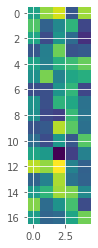

In [11]:
plt.imshow(model.layers[0].get_weights()[0])

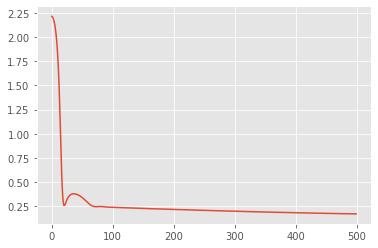

In [12]:
plt.plot(history.history['loss'])

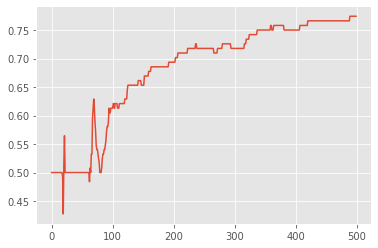

In [13]:
plt.plot(history.history['accuracy'])